<a href="https://colab.research.google.com/github/asim5800/Bank-Marketing-Effectiveness-Prediction-/blob/main/Bank_Marketing_Effectiveness_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting the effectiveness of bank marketing campaigns </u></b>

## <b> Problem Description </b>

### The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The classification goal is to predict if the client will subscribe a term deposit (variable y).


## <b> Data Description </b>

## <b>Input variables: </b>
### <b> Bank Client data: </b>

* ### age (numeric)
* ### job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* ### marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* ### education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* ### default: has credit in default? (categorical: 'no','yes','unknown')
* ### housing: has housing loan? (categorical: 'no','yes','unknown')
* ### loan: has personal loan? (categorical: 'no','yes','unknown')

### <b> Related with the last contact of the current campaign:</b>
* ### contact: contact communication type (categorical: 'cellular','telephone')
* ### month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* ### day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
* ### duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### <b>Other attributes: </b>
* ### campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* ### pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* ### previous: number of contacts performed before this campaign and for this client (numeric)
* ### poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


### <b>Output variable (desired target):</b>
* ### y - has the client subscribed a term deposit? (binary: 'yes','no')

In [156]:
#Models 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#model evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import  RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import  precision_score, recall_score,f1_score
from sklearn.metrics import plot_roc_curve



In [157]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [158]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.pylab as pylab
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [159]:

df= pd.read_csv('/content/drive/MyDrive/Bank Marketing Effectiveness Prediction- Asim Siddiqui/Bank-full.csv', sep = ';')

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [161]:
df.tail(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [162]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [163]:
#renaming column
df.rename(columns = {'y' : 'Subscribed'}, inplace = True)


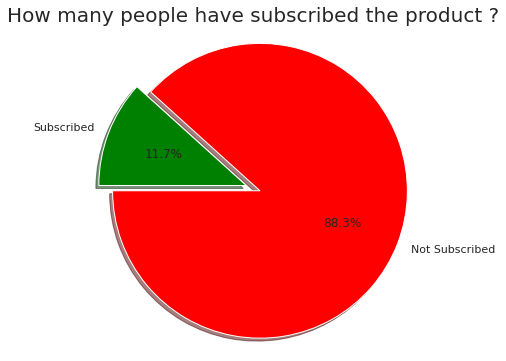

In [214]:
#EDA


labels = 'Not Subscribed' , 'Subscribed'
sizes = df.Subscribed.value_counts()
colors = ['red', 'green']
explode = (0.1, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("How many people have subscribed the product ?",fontsize=20)
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()


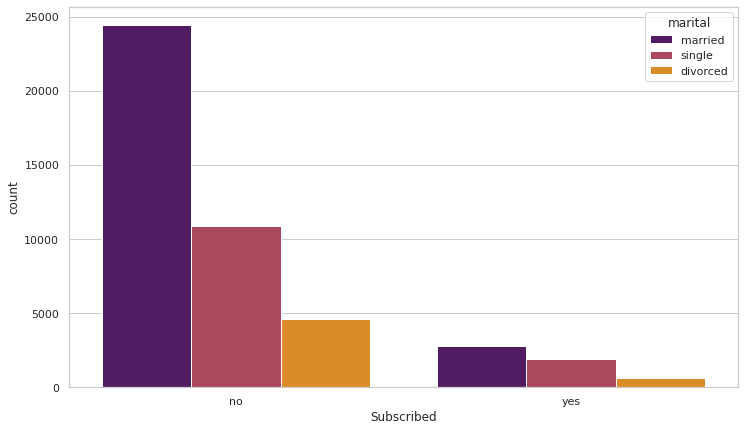

In [165]:
sns.set_style("whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(12, 7)
store_type=sns.countplot(x='Subscribed',hue='marital', data=df, palette="inferno")



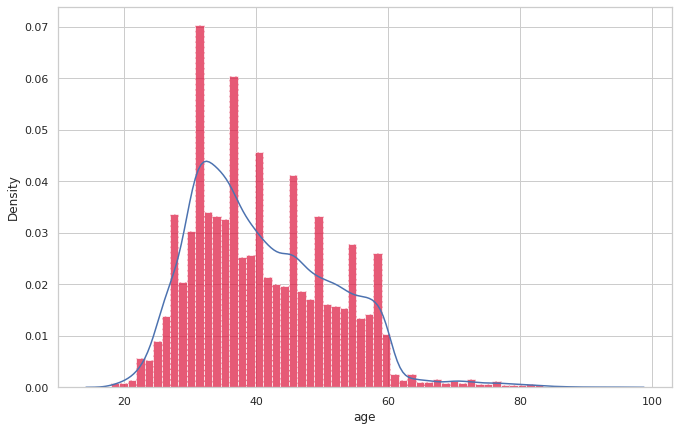

In [166]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.distplot(df["age"],
                hist_kws = {'color':'#DC143C',
                     'linestyle':'--', 'alpha':0.7}, bins=60); # hist keyword parameter to change hist format


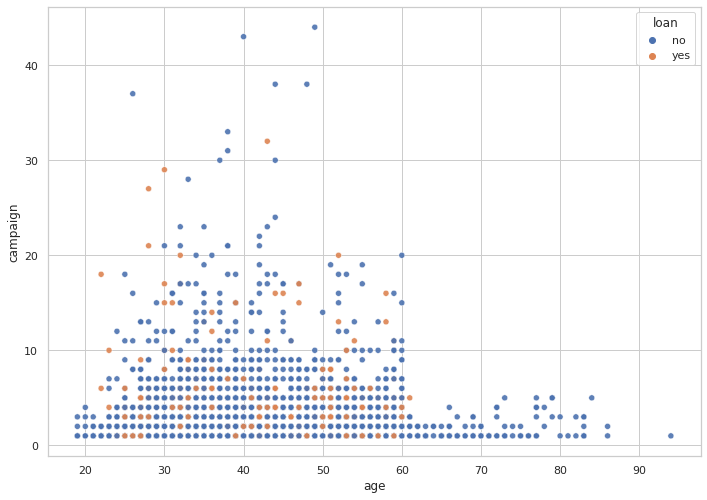

In [167]:
sample_loan=df.sample(5000)
sns.scatterplot(x="age", y="campaign", hue="loan", data=sample_loan,x_bins=50,y_bins=50,alpha=0.9);

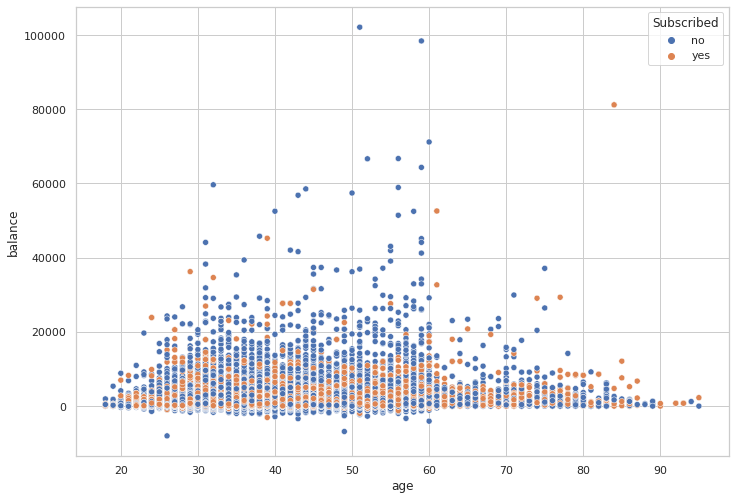

In [249]:
sns.scatterplot(x="age", y="balance",hue='Subscribed',data=df);

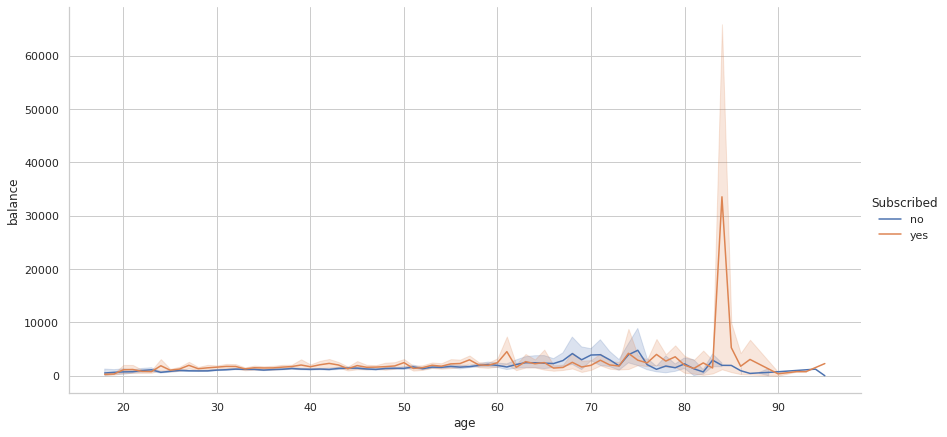

In [170]:
sns.relplot(x="age", y="balance", kind="line", data=df, hue='Subscribed',height=6,aspect=2 );

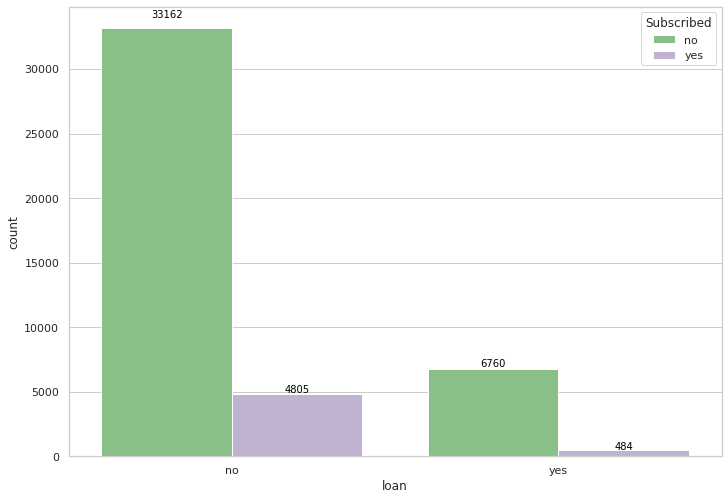

In [171]:
g=sns.countplot(x="loan", hue="Subscribed", data=df,palette= 'Accent');


for p in g.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    g.annotate(f'{height}', (x + width/2, y + height*1.025), ha='center',color='black', size=10)



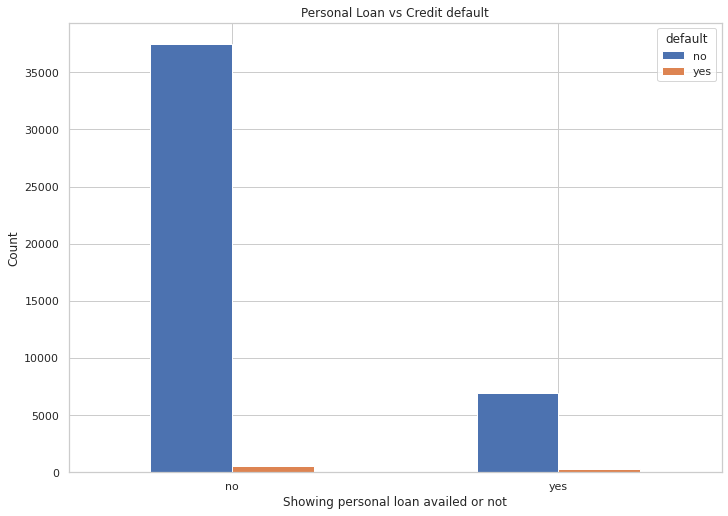

In [172]:
pd.crosstab(df.loan,df.default).plot(kind='bar');
plt.title("Personal Loan vs Credit default")
plt.xlabel('Showing personal loan availed or not')
plt.ylabel('Count');
plt.xticks(rotation=0);


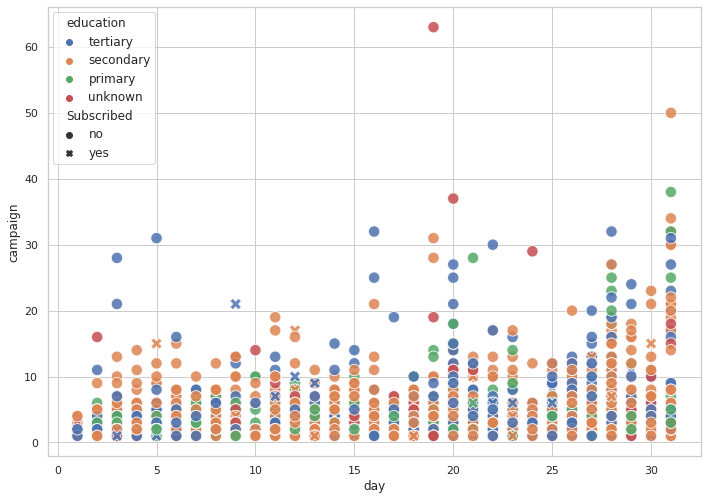

In [250]:
sample_loan=df.sample(6000)
sns.scatterplot(x="day", y="campaign", hue="education", data=sample_loan,x_bins=50,y_bins=50,alpha=0.85, style="Subscribed",s=130 );

In [174]:
#removing unknown occupation
df1 = df[df.job != 'unknown']

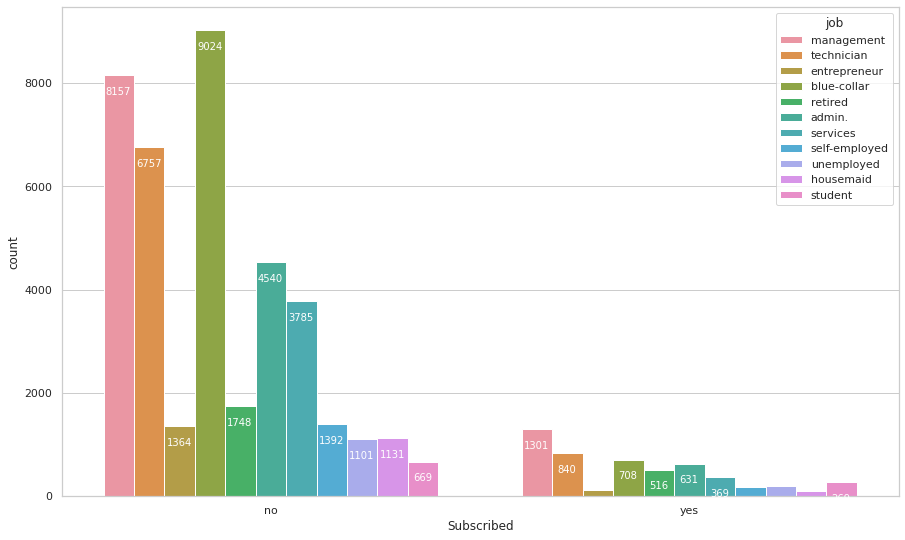

In [175]:
sns.set_style("whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(15, 9)
job_sub=sns.countplot(x='Subscribed',hue='job', data=df1)

for p in job_sub.patches:
    job_sub.annotate(f'\n{p.get_height()}', (p.get_x()+0.035, p.get_height()),ha='center', va='top', color='white', size=10)


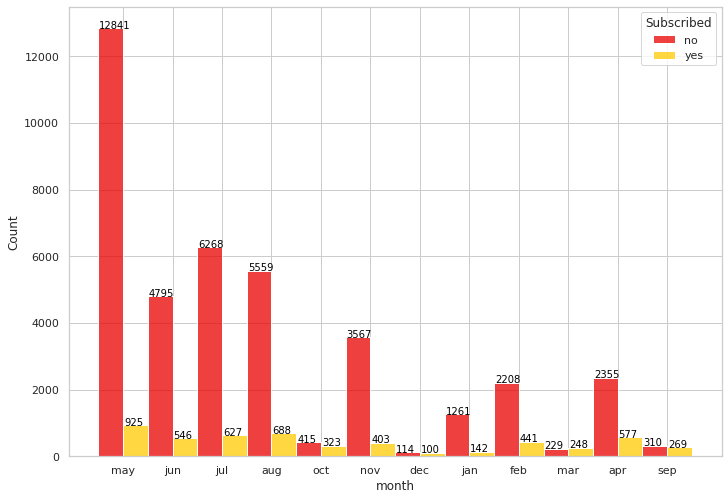

In [176]:
sns.set_style("whitegrid")
mon_sub=sns.histplot(binwidth=0.4, x="month", hue="Subscribed", data=df, stat="count", multiple="dodge" ,palette='hot',bins=40);


for p in mon_sub.patches:
    mon_sub.annotate(f'\n{p.get_height()}', (p.get_x()+0.02, p.get_height()+0.03), color='black', size=10)

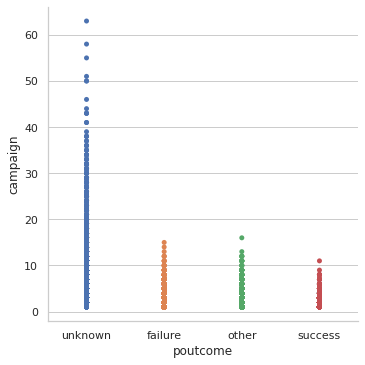

In [177]:
sns.catplot(x="poutcome", y="campaign",jitter=False, data=df1);


In [178]:
df2=df.copy()
#from scipy import stats
#df2[(np.abs(stats.zscore(df2)) < 3).all(axis=1)]

In [179]:
#converting categorical feature into numeric
for label, content in df2.items():
    if not pd.api.types.is_numeric_dtype(content):
      df2[label]=pd.Categorical(content).codes #turning categories into numbers


In [180]:
df2.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Subscribed
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0
45210,37,2,1,1,0,2971,0,0,0,17,9,361,2,188,11,1,0


In [181]:
df_temp=df2.copy()
df_temp.drop('contact', axis=1,inplace=True)

In [182]:
# converting all columns to int64
cols = ['job', 'marital','education','default', 'housing', 'loan', 'month', 'poutcome','Subscribed']
df_temp[cols] = df_temp[cols].applymap(np.int64)


In [183]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   age         45211 non-null  int64
 1   job         45211 non-null  int64
 2   marital     45211 non-null  int64
 3   education   45211 non-null  int64
 4   default     45211 non-null  int64
 5   balance     45211 non-null  int64
 6   housing     45211 non-null  int64
 7   loan        45211 non-null  int64
 8   day         45211 non-null  int64
 9   month       45211 non-null  int64
 10  duration    45211 non-null  int64
 11  campaign    45211 non-null  int64
 12  pdays       45211 non-null  int64
 13  previous    45211 non-null  int64
 14  poutcome    45211 non-null  int64
 15  Subscribed  45211 non-null  int64
dtypes: int64(16)
memory usage: 5.5 MB


In [184]:
df_temp.describe()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,Subscribed
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,4.339762,1.167725,1.224813,0.018027,1362.272058,0.555838,0.160226,15.806419,5.523014,258.163080,2.763841,40.197828,0.580323,2.559974,0.116985
std,10.618762,3.272657,0.608230,0.747997,0.133049,3044.765829,0.496878,0.366820,8.322476,3.006911,257.527812,3.098021,100.128746,2.303441,0.989059,0.321406
min,18.000000,0.000000,0.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,1.000000,1.000000,0.000000,72.000000,0.000000,0.000000,8.000000,3.000000,103.000000,1.000000,-1.000000,0.000000,3.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,448.000000,1.000000,0.000000,16.000000,6.000000,180.000000,2.000000,-1.000000,0.000000,3.000000,0.000000
75%,48.000000,7.000000,2.000000,2.000000,0.000000,1428.000000,1.000000,0.000000,21.000000,8.000000,319.000000,3.000000,-1.000000,0.000000,3.000000,0.000000
max,95.000000,11.000000,2.000000,3.000000,1.000000,102127.000000,1.000000,1.000000,31.000000,11.000000,4918.000000,63.000000,871.000000,275.000000,3.000000,1.000000


In [256]:
df_working=df_temp.copy()

In [257]:
df_working = df_working.drop(df[(df_working.balance < 100)|(df_working.balance > 60000)|(df_working.duration < 5)].index)#removing those people having balance<100 and call <5

In [258]:
df_working.describe()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,Subscribed
count,32750.000000,32750.000000,32750.00000,32750.000000,32750.000000,32750.000000,32750.000000,32750.000000,32750.000000,32750.000000,32750.000000,32750.000000,32750.000000,32750.000000,32750.000000,32750.000000
mean,41.259511,4.365557,1.18287,1.242107,0.003298,1890.245344,0.549130,0.137710,15.680244,5.500366,263.920824,2.692977,43.302260,0.647145,2.520763,0.133557
std,10.834351,3.259392,0.60097,0.753575,0.057332,3190.466455,0.497588,0.344601,8.267685,3.077259,263.211892,2.936771,102.333209,2.524619,1.019301,0.340181
min,18.000000,0.000000,0.00000,0.000000,0.000000,100.000000,0.000000,0.000000,1.000000,0.000000,5.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,1.00000,1.000000,0.000000,363.000000,0.000000,0.000000,8.000000,3.000000,105.000000,1.000000,-1.000000,0.000000,3.000000,0.000000
50%,39.000000,4.000000,1.00000,1.000000,0.000000,834.000000,1.000000,0.000000,16.000000,6.000000,184.000000,2.000000,-1.000000,0.000000,3.000000,0.000000
75%,49.000000,7.000000,2.00000,2.000000,0.000000,2085.000000,1.000000,0.000000,21.000000,8.000000,326.000000,3.000000,-1.000000,0.000000,3.000000,0.000000
max,95.000000,11.000000,2.00000,3.000000,1.000000,59649.000000,1.000000,1.000000,31.000000,11.000000,4918.000000,63.000000,871.000000,275.000000,3.000000,1.000000


In [238]:
df_working.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32758 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   age         32758 non-null  int64
 1   job         32758 non-null  int64
 2   marital     32758 non-null  int64
 3   education   32758 non-null  int64
 4   default     32758 non-null  int64
 5   balance     32758 non-null  int64
 6   housing     32758 non-null  int64
 7   loan        32758 non-null  int64
 8   day         32758 non-null  int64
 9   month       32758 non-null  int64
 10  duration    32758 non-null  int64
 11  campaign    32758 non-null  int64
 12  pdays       32758 non-null  int64
 13  previous    32758 non-null  int64
 14  poutcome    32758 non-null  int64
 15  Subscribed  32758 non-null  int64
dtypes: int64(16)
memory usage: 4.2 MB


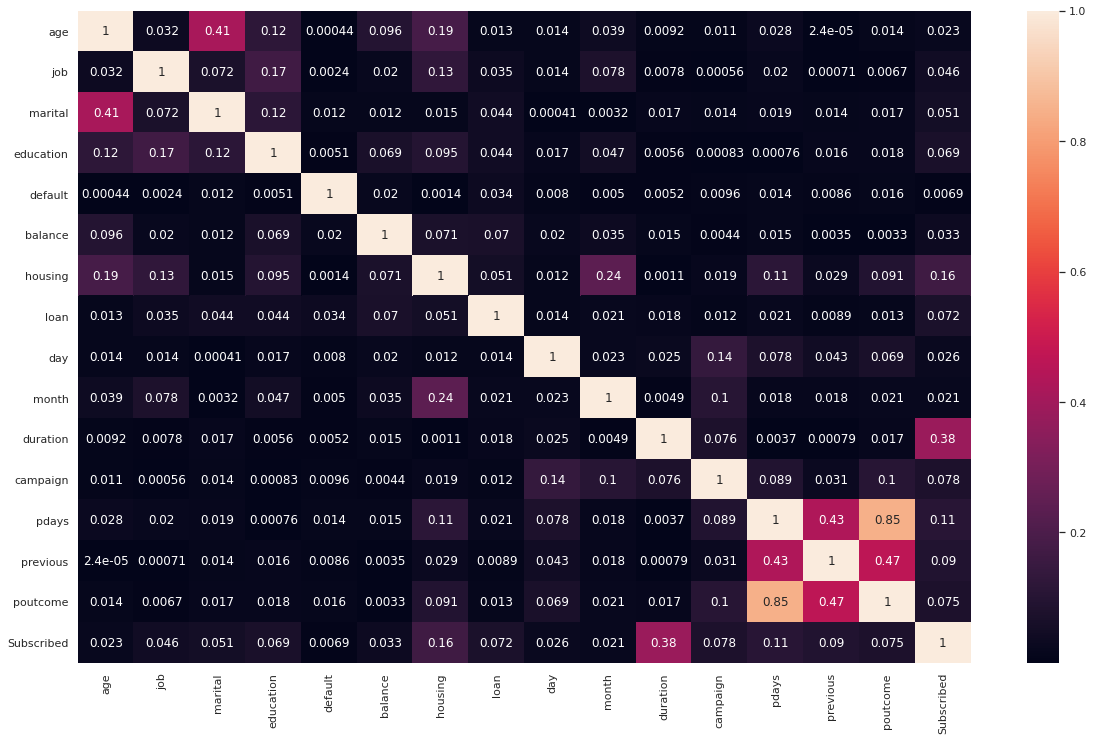

In [263]:
plt.subplots(figsize=(20,12))
sns.heatmap(df_working.corr().abs(), annot=True);